
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import pandas as pd_users
import pandas as pd_calls
import pandas as pd_messages
import pandas as pd_internet
import pandas as pd_plans
from datetime import datetime
import math

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Se realiza la carga de la libreria math
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd_users.read_csv('/datasets/megaline_users.csv')
calls = pd_calls.read_csv('/datasets/megaline_calls.csv')
messages = pd_messages.read_csv('/datasets/megaline_messages.csv')
internet = pd_internet.read_csv('/datasets/megaline_internet.csv')
plans = pd_plans.read_csv('/datasets/megaline_plans.csv', sep=',', decimal='.')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

#Comentario: Se visualiza en la tabla plans que no tiene ningún tipo de problema, por lo tanto, no es necesario corregirlo.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
print(plans.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Para realziar la conversión de megabytes a gigabytes, se debe tomar el campo mb_per_month_included diviendo a 1024. Cabe indicar que 1024 megas equivale a 1GB. Esta conversión se realiza más adelante cuando se hace lo cálculos de ingresos mensuales.
</div>

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
print(plans.duplicated().sum())

0


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprime una muestra de datos para usuarios
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

#Comentario: Veo que tiene valores ausentes en el campo churn_date

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
print(users.isna().sum())
dat_camb = datetime.now()
dat_fec = datetime.strftime(dat_camb, '%d/%m/%Y')
users['churn_date'].fillna(dat_fec, inplace=True)
print()
print(users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64


#Comentario: Se modifica los valores ausentes de 466 con fecha actual

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT')
print(users)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
3                                Tulsa, OK MSA 2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      surf   
..                                         ..

<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para hacer la transformación de reg_date a un datatime puedes hacer uso de la siguiente función:
    
    pd.to_datetime(user['reg_date'], format='%Y-%m-%d')
    
te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas. Los mismo para las otras variables que son fechas de otras bases de datos.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se realiza la transformación del campo reg_date a un formato datatime.
</div>

#Comentario: Se muestra en la columna churn_date con valores de fecha actual.

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
# Imprime una muestra de datos para las llamadas
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

#Comentario: No hay necesidad de realizar ningún cambio a la estructura inicial.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
print(calls.isna().sum())
print()
print(calls.duplicated().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64

0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [53]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT')
print(calls)

              id  user_id  call_date  duration  month
0        1000_93     1000 2018-12-27      8.52     12
1       1000_145     1000 2018-12-27     13.66     12
2       1000_247     1000 2018-12-27     14.48     12
3       1000_309     1000 2018-12-28      5.76     12
4       1000_380     1000 2018-12-30      4.22     12
...          ...      ...        ...       ...    ...
137730  1499_199     1499 2018-11-21      8.72     11
137731  1499_200     1499 2018-10-20     10.89     10
137732  1499_201     1499 2018-09-21      8.12      9
137733  1499_202     1499 2018-10-10      0.37     10
137734  1499_203     1499 2018-12-29     13.86     12

[137735 rows x 5 columns]


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que es necesario cambiar el tipo de variable de las fechas a date
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se realiza la transformación del campo call_date a un formato datatime.
</div>

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [16]:
# Imprime una muestra de datos para los mensajes
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

#Comentario: No hay necesidad de realizar ningún cambio a la estructura inicial.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [54]:
print(messages.isna().sum())
print()
print(messages.duplicated().sum())

id              0
user_id         0
message_date    0
month           0
dtype: int64

0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [55]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT')
print(messages)

             id  user_id message_date  month
0      1000_125     1000   2018-12-27     12
1      1000_160     1000   2018-12-31     12
2      1000_223     1000   2018-12-31     12
3      1000_251     1000   2018-12-27     12
4      1000_255     1000   2018-12-26     12
...         ...      ...          ...    ...
76046  1497_526     1497   2018-12-24     12
76047  1497_536     1497   2018-12-24     12
76048  1497_547     1497   2018-12-31     12
76049  1497_558     1497   2018-12-24     12
76050  1497_613     1497   2018-12-23     12

[76051 rows x 4 columns]


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que es necesario cambiar el tipo de variable de las fechas a date
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se realiza la transformación del campo message_date a un formato datatime.
</div>

## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

#Comentario: No hay necesidad de realizar ningún cambio a la estructura inicial.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [63]:
print(internet.isna().sum())
print()
print(internet.duplicated().sum())

id              0
user_id         0
session_date    0
mb_used         0
month           0
dtype: int64

0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [64]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT')
print(internet)

              id  user_id session_date  mb_used  month
0        1000_13     1000   2018-12-29    89.86     12
1       1000_204     1000   2018-12-31     0.00     12
2       1000_379     1000   2018-12-28   660.40     12
3       1000_413     1000   2018-12-26   270.99     12
4       1000_442     1000   2018-12-27   880.22     12
...          ...      ...          ...      ...    ...
104820  1499_215     1499   2018-10-20   218.06     10
104821  1499_216     1499   2018-12-30   304.72     12
104822  1499_217     1499   2018-09-22   292.75      9
104823  1499_218     1499   2018-12-07     0.00     12
104824  1499_219     1499   2018-12-24   758.31     12

[104825 rows x 5 columns]


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se toma en cuenta la consideración mencionada donde realizo lo indicado en el calculo mensual por usuario donde transformo de megas a gigas y luego hago el redondeo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Cuando hacemos análisis de datos, un paso que es muy importate realizar es verificar que no se tengan duplicados en nuestras bases de datos y en caso de tener duplicados entender si hace sentido su duplicación o solamente son errores de registro. En este sentido sería importante que para todas las bases de datos desarrolles un análisis de registros duplicados.
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se agrega en Corregir datos, el código para los registros ausentes y valores duplicados, además de agregar en Enriquecer los datos, el código de conversión a datatime.
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month'] = pd_calls.to_datetime(calls['call_date']).dt.month
grp_calls = calls.groupby(['user_id','month']).count().reset_index()
print(grp_calls[['user_id','month','id']])

      user_id  month  id
0        1000     12  16
1        1001      8  27
2        1001      9  49
3        1001     10  65
4        1001     11  64
...       ...    ...  ..
2253     1498     12  39
2254     1499      9  41
2255     1499     10  53
2256     1499     11  45
2257     1499     12  65

[2258 rows x 3 columns]



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>



In [66]:
pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                            values=['duration'],
                            aggfunc=['sum','count']).reset_index()
print(pivot_calls)

     user_id month      sum    count
                   duration duration
0       1000    12   116.83       16
1       1001     8   171.14       27
2       1001     9   297.69       49
3       1001    10   374.11       65
4       1001    11   404.59       64
...      ...   ...      ...      ...
2253    1498    12   324.77       39
2254    1499     9   330.37       41
2255    1499    10   363.28       53
2256    1499    11   288.56       45
2257    1499    12   468.10       65

[2258 rows x 4 columns]


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se realiza el agrupamiento usando pivot_table donde indica el mismo resultado que tengo en los cuadros: por número de llamadas y cantidad de minutos
</div>

In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
grp_calls_min = calls.groupby(['user_id','month']).sum().reset_index()
print(grp_calls_min)

      user_id  month  duration
0        1000     12    116.83
1        1001      8    171.14
2        1001      9    297.69
3        1001     10    374.11
4        1001     11    404.59
...       ...    ...       ...
2253     1498     12    324.77
2254     1499      9    330.37
2255     1499     10    363.28
2256     1499     11    288.56
2257     1499     12    468.10

[2258 rows x 3 columns]


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = pd_messages.to_datetime(messages['message_date']).dt.month
grp_messages = messages.groupby(['user_id','month']).count().reset_index()
print(grp_messages[['user_id','month','id']])

      user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = pd_internet.to_datetime(internet['session_date']).dt.month
grp_internet = internet.groupby(['user_id','month']).sum().reset_index()
print(grp_internet)

      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
mrg_call = grp_calls.merge(grp_calls_min, how='outer', on=['user_id','month'])
mrg_men = mrg_call.merge(grp_messages, how='outer', on=['user_id','month'])
mrg_int = mrg_men.merge(grp_internet, how='outer', on=['user_id','month'])
df_detalle = mrg_int[['user_id','month','id_x','duration_y','id_y','mb_used']]
df_detalle.columns = ['user_id','month','llamadas','minutos','mensajes','internet']
df_detalle['llamadas'].fillna(0, inplace=True)
df_detalle['minutos'].fillna(0, inplace=True)
df_detalle['mensajes'].fillna(0, inplace=True)
df_detalle['internet'].fillna(0, inplace=True)
print(df_detalle)

      user_id  month  llamadas  minutos  mensajes  internet
0        1000     12      16.0   116.83      11.0   1901.47
1        1001      8      27.0   171.14      30.0   6919.15
2        1001      9      49.0   297.69      44.0  13314.82
3        1001     10      65.0   374.11      53.0  22330.49
4        1001     11      64.0   404.59      36.0  18504.30
...       ...    ...       ...      ...       ...       ...
2288     1349     12       0.0     0.00      61.0  13039.91
2289     1361      5       0.0     0.00       2.0   1519.69
2290     1482     10       0.0     0.00       2.0      0.00
2291     1108     12       0.0     0.00       0.0    233.17
2292     1311      6       0.0     0.00       0.0   1498.83

[2293 rows x 6 columns]


/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [29]:
# Añade la información de la tarifa
mrg_user = df_detalle.merge(users, how='inner', on='user_id')
mrg_tar = mrg_user.merge(plans, how='inner', left_on='plan', right_on='plan_name')
print(mrg_tar[['user_id','month','llamadas','minutos','mensajes','internet','plan','messages_included','mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb','usd_per_message','usd_per_minute']].sort_values(by=['user_id','month']))

      user_id  month  llamadas  minutos  mensajes  internet      plan  \
0        1000     12      16.0   116.83      11.0   1901.47  ultimate   
720      1001      8      27.0   171.14      30.0   6919.15      surf   
721      1001      9      49.0   297.69      44.0  13314.82      surf   
722      1001     10      65.0   374.11      53.0  22330.49      surf   
723      1001     11      64.0   404.59      36.0  18504.30      surf   
...       ...    ...       ...      ...       ...       ...       ...   
2261     1498     12      39.0   324.77       0.0  23137.69      surf   
2262     1499      9      41.0   330.37       0.0  12984.76      surf   
2263     1499     10      53.0   363.28       0.0  19492.43      surf   
2264     1499     11      45.0   288.56       0.0  16813.83      surf   
2265     1499     12      65.0   468.10       0.0  22059.21      surf   

      messages_included  mb_per_month_included  minutes_included  \
0                  1000                  30720         

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
mrg_tar['minutos'] = np.ceil(mrg_tar['minutos'])
mrg_tar['exc_min'] = np.maximum(mrg_tar['minutos'] - mrg_tar['minutes_included'],0)
mrg_tar['exc_men'] = np.maximum(mrg_tar['mensajes'] - mrg_tar['messages_included'],0)
mrg_tar['exc_int'] = np.maximum(mrg_tar['internet'] - mrg_tar['mb_per_month_included'],0)
mrg_tar['conv_gb'] = np.ceil(mrg_tar['exc_int'] / 1024)
mrg_tar['cal_min'] = mrg_tar['exc_min'] * mrg_tar['usd_per_minute']
mrg_tar['cal_men'] = mrg_tar['exc_men'] * mrg_tar['usd_per_message']
mrg_tar['cal_int'] = mrg_tar['conv_gb'] * mrg_tar['usd_per_gb']
mrg_tar['usd_tar'] = mrg_tar['usd_monthly_pay'] + mrg_tar['cal_min'] + mrg_tar['cal_men'] + mrg_tar['cal_int']
print(mrg_tar)

      user_id  month  llamadas  minutos  mensajes  internet  first_name  \
0        1000     12      16.0    117.0      11.0   1901.47    Anamaria   
1        1006     11       2.0     10.0      15.0   2068.37      Jesusa   
2        1006     12       9.0     55.0     139.0  32118.82      Jesusa   
3        1008     10      71.0    451.0      21.0  17106.99       Emely   
4        1008     11      63.0    423.0      37.0  23676.72       Emely   
...       ...    ...       ...      ...       ...       ...         ...   
2288     1194     11       0.0      0.0      62.0  42866.10      Robert   
2289     1194     12       0.0      0.0      56.0  31088.49      Robert   
2290     1349     10       0.0      0.0      76.0  13093.55  Florentina   
2291     1349     11       0.0      0.0      72.0  17128.26  Florentina   
2292     1349     12       0.0      0.0      61.0  13039.91  Florentina   

     last_name  age                                    city  ...  \
0        Bauer   45   Atlanta-S

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

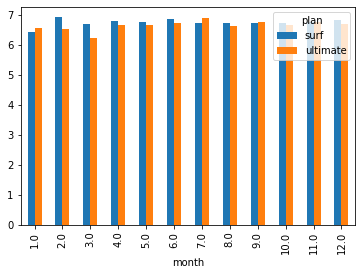

plan,surf,ultimate
month,,
1.0,6.428000,6.541518
2.0,6.906175,6.517230
3.0,6.696919,6.210906
4.0,6.799918,6.659990
5.0,6.769200,6.662443
6.0,6.846812,6.705188
7.0,6.721710,6.879085
8.0,6.726164,6.613484
9.0,6.728684,6.770040


In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
mrg_cal_us = calls.merge(users, how='outer', on='user_id')
grp_cal_us = mrg_cal_us.groupby(['month','plan'])['duration'].mean().reset_index()
mon_pivot = grp_cal_us.pivot_table(index='month', columns='plan', values='duration', aggfunc='mean')
mon_pivot.plot(kind='bar')
plt.show()
mon_pivot

count    1573.000000
mean      405.250477
std       221.684445
min         0.000000
25%       256.000000
50%       402.000000
75%       544.000000
max      1432.000000
Name: minutos, dtype: float64

count     720.000000
mean      406.708333
std       227.270019
min         0.000000
25%       247.000000
50%       399.000000
75%       532.500000
max      1293.000000
Name: minutos, dtype: float64


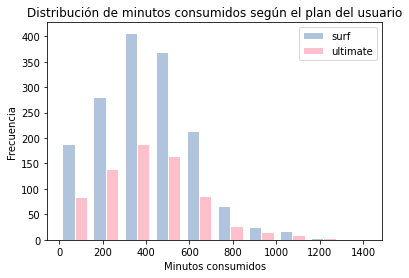

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_mon_min_s = mrg_tar[mrg_tar['plan'] == 'surf']['minutos']
print(df_mon_min_s.describe())
print()
df_mon_min_u = mrg_tar[mrg_tar['plan'] == 'ultimate']['minutos']
print(df_mon_min_u.describe())


x = [df_mon_min_s, df_mon_min_u]

fig, ax = plt.subplots()
ax.hist(x, bins=10, color=['lightsteelblue', 'pink'], edgecolor="white")

plt.title('Distribución de minutos consumidos según el plan del usuario')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Minutos consumidos')
plt.ylabel('Frecuencia')

plt.show()


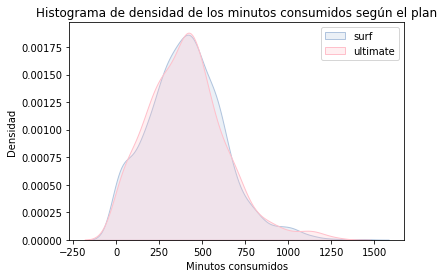

In [33]:
sns.kdeplot(x = df_mon_min_s, fill=True, color='lightsteelblue')
sns.kdeplot(x = df_mon_min_u, fill=True, shade=True, color='pink')

plt.title('Histograma de densidad de los minutos consumidos según el plan')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Minutos consumidos')
plt.ylabel('Densidad')


plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_ll_s = df_mon_min_s.mean()
print("La media de llamadas con plan surf es:",mean_ll_s)

var_ll_s = np.var(df_mon_min_s)
print("La varianza de llamadas con plan surf es:",var_ll_s)

mean_ll_u = df_mon_min_u.mean()
print("La media de llamadas con plan ultimate es:",mean_ll_u)

var_ll_u = np.var(df_mon_min_u)
print("La varianza de llamadas con plan ultimate es:",var_ll_u)

La media de llamadas con plan surf es: 405.2504767959313
La varianza de llamadas con plan surf es: 49112.75099309752
La media de llamadas con plan ultimate es: 406.7083333333333
La varianza de llamadas con plan ultimate es: 51579.923263888886


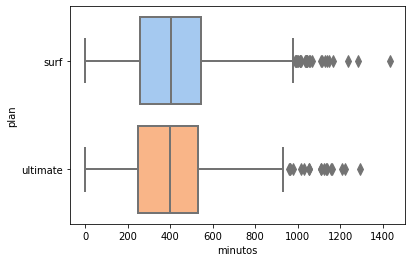

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(x="minutos", y="plan", data=mrg_tar, palette='pastel', saturation=0.9, linewidth=2, fliersize=8, order=['surf','ultimate'])

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

El comportamiento en llamadas de los usuarios con respecto a minutos son casi similares a los planes: ultimate y surf. Esto se lo puede observar mediante los gráficos de densidad, de cajas. Además, se muestra con los datos en media, varianza, mediana y desviación estandar.

### Mensajes

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: mensajes, dtype: float64

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: mensajes, dtype: float64


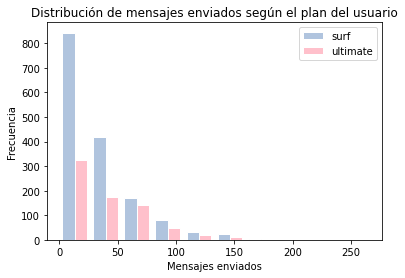

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_mon_men_s = mrg_tar[mrg_tar['plan'] == 'surf']['mensajes']
print(df_mon_men_s.describe())
print()
df_mon_men_u = mrg_tar[mrg_tar['plan'] == 'ultimate']['mensajes']
print(df_mon_men_u.describe())

x=[df_mon_men_s, df_mon_men_u]

fig, ax = plt.subplots()
ax.hist(x, bins=10, color=['lightsteelblue', 'pink'], edgecolor = "white")

plt.title('Distribución de mensajes enviados según el plan del usuario')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Mensajes enviados')
plt.ylabel('Frecuencia')

plt.show()

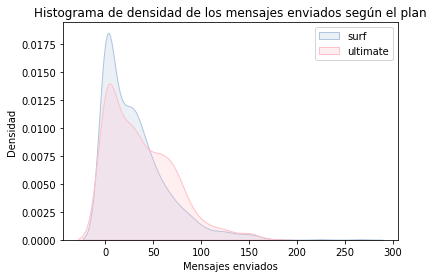

In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
sns.kdeplot(x = df_mon_men_s, fill = True, color='lightsteelblue')
sns.kdeplot(x = df_mon_men_u, fill = True, shade=True, color= 'pink')

plt.title('Histograma de densidad de los mensajes enviados según el plan')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Mensajes enviados')
plt.ylabel('Densidad')

plt.show()

In [38]:
# Calcula la media y la varianza de la duración mensual de mensajes
mean_me_s = df_mon_men_s.mean()
print("La media de llamadas con plan surf es:",mean_me_s)

var_me_s = np.var(df_mon_men_s)
print("La varianza de llamadas con plan surf es:",var_me_s)

mean_me_u = df_mon_men_u.mean()
print("La media de llamadas con plan ultimate es:",mean_me_u)

var_me_u = np.var(df_mon_men_u)
print("La varianza de llamadas con plan ultimate es:",var_me_u)

La media de llamadas con plan surf es: 31.15956770502225
La varianza de llamadas con plan surf es: 1126.008231726662
La media de llamadas con plan ultimate es: 37.55138888888889
La varianza de llamadas con plan ultimate es: 1207.0779147376543


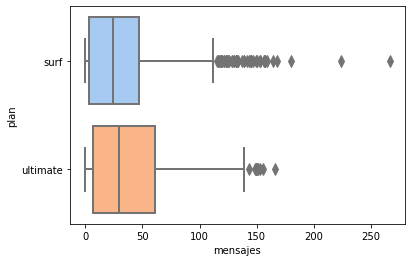

In [39]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente
sns.boxplot(x = "mensajes", y = "plan", data = mrg_tar, palette= 'pastel',  saturation = 0.9, linewidth = 2,
           fliersize = 8, order=['surf', 'ultimate'])


plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Se visualiza en la gráfica mostrando en el de Cajas y Bigotes, que los usuarios de surf tienden a enviar menos de 50 mensajes pero muestra un comportamiento de los datos con sesgo a la derecha demostrando datos que se encuentran fuera del rango intercuartilico superior por lo tanto, tiene datos atípicos. 

### Internet

count     1573.000000
mean     16558.283490
std       8013.513327
min          0.000000
25%      11986.520000
50%      16829.310000
75%      20999.610000
max      70931.590000
Name: internet, dtype: float64

count      720.000000
mean     17214.699694
std       7851.897435
min          0.000000
25%      12666.955000
50%      16858.340000
75%      21014.527500
max      46595.330000
Name: internet, dtype: float64


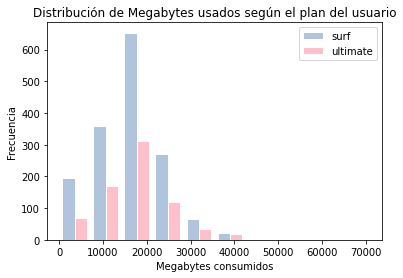

In [40]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_mon_int_s = mrg_tar[mrg_tar['plan'] == 'surf']['internet']
print(df_mon_int_s.describe())
print()
df_mon_int_u = mrg_tar[mrg_tar['plan'] == 'ultimate']['internet']
print(df_mon_int_u.describe())

x=[df_mon_int_s, df_mon_int_u]

fig, ax = plt.subplots()
ax.hist(x, bins=10, color=['lightsteelblue', 'pink'], edgecolor = "white")

plt.title('Distribución de Megabytes usados según el plan del usuario')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Megabytes consumidos')
plt.ylabel('Frecuencia')

plt.show()

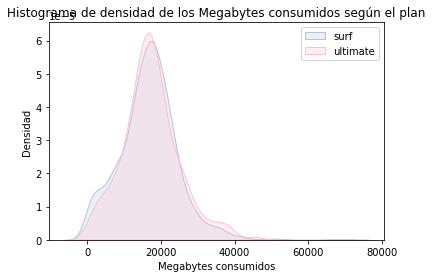

In [41]:
#Gráfico de densidad de los Megabytes consumidos
sns.kdeplot(x = df_mon_int_s, fill = True, color='lightsteelblue')
sns.kdeplot(x = df_mon_int_u, fill = True, shade=True, color= 'pink')

plt.title('Histograma de densidad de los Megabytes consumidos según el plan')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Megabytes consumidos')
plt.ylabel('Densidad')


plt.show()

In [42]:
# Calculo de media y varianza de los Megabytes consumidos.
mean_int_s = df_mon_int_s.mean()
print("La media de llamadas con plan surf es:",mean_int_s)

var_int_s = np.var(df_mon_int_s)
print("La varianza de llamadas con plan surf es:",var_int_s)

mean_int_u = df_mon_int_u.mean()
print("La media de llamadas con plan ultimate es:",mean_int_u)

var_int_u = np.var(df_mon_int_u)
print("La varianza de llamadas con plan ultimate es:",var_int_u)

La media de llamadas con plan surf es: 16558.283490146216
La varianza de llamadas con plan surf es: 64175571.68301331
La media de llamadas con plan ultimate es: 17214.699694444447
La varianza de llamadas con plan ultimate es: 61566665.1386863


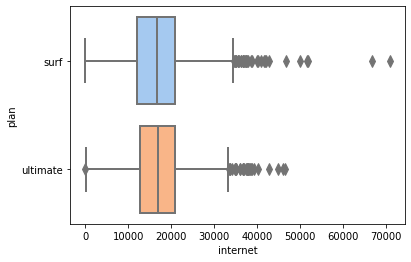

In [43]:
# Traza un diagrama de caja para visualizar la distribución de los Megabytes consumidos mensualmente
sns.boxplot(x = "internet", y = "plan", data = mrg_tar, palette= 'pastel',  saturation = 0.9, linewidth = 2,
           fliersize = 8, order=['surf', 'ultimate'])

plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

En el consumo de megabytes sobre los usuarios tiende a ser similar a los dos planes en cuanto a la distribución normal de la maypría de usuarios. Sin embargo, cabe mencionar que el limite de consumo del plan de surf es de 15GB, poco más del 60% de los usuarios superaron el límite de su plan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

count    1573.000000
mean       60.331933
std        55.263890
min        20.000000
25%        20.000000
50%        40.150000
75%        80.000000
max       588.660000
Name: usd_tar, dtype: float64

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: usd_tar, dtype: float64


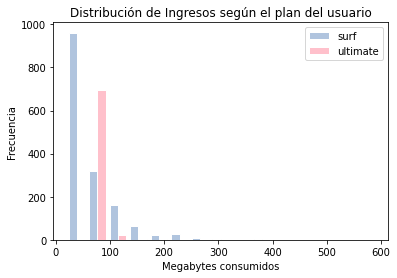

In [44]:
df_mon_ing_s = mrg_tar[mrg_tar['plan'] == 'surf']['usd_tar']
print(df_mon_ing_s.describe())
print()
df_mon_ing_u = mrg_tar[mrg_tar['plan'] == 'ultimate']['usd_tar']
print(df_mon_ing_u.describe())

#Acá procedemos con el gráfico de distribución:

x = [df_mon_ing_s, df_mon_ing_u]

fig, ax = plt.subplots()
ax.hist(x, bins=15, color=['lightsteelblue', 'pink'], edgecolor = "white")

plt.title('Distribución de Ingresos según el plan del usuario')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Megabytes consumidos')
plt.ylabel('Frecuencia')

plt.show()

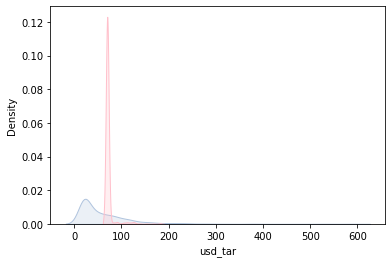

In [45]:
#El histograma anterior se puede ver mejor con a través de un gráfico de densidad.
sns.kdeplot(x = df_mon_ing_s, fill = True, color='lightsteelblue')
sns.kdeplot(x = df_mon_ing_u, fill = True, shade=True, color= 'pink')

plt.show()

In [46]:
# Calculo de media y varianza de los ingresos.
mean_ing_s = df_mon_ing_s.mean()
print("La media de llamadas con plan surf es:",mean_ing_s)

var_ing_s = np.var(df_mon_ing_s)
print("La varianza de llamadas con plan surf es:",var_ing_s)

mean_ing_u = df_mon_ing_u.mean()
print("La media de llamadas con plan ultimate es:",mean_ing_u)

var_ing_u = np.var(df_mon_ing_u)
print("La varianza de llamadas con plan ultimate es:",var_ing_u)

La media de llamadas con plan surf es: 60.331932612841705
La varianza de llamadas con plan surf es: 3052.155930912179
La media de llamadas con plan ultimate es: 72.31388888888888
La varianza de llamadas con plan ultimate es: 129.66814043209877


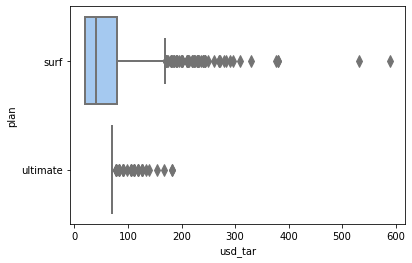

In [47]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos mensuales
sns.boxplot(x = "usd_tar", y = "plan", data = mrg_tar, palette= 'pastel',  saturation = 0.9, linewidth = 2,
           fliersize = 8, order=['surf', 'ultimate'])

plt.show()

In [48]:
#Usuarios de ultimate que superaron el monto del plan:

ultimate_users_spent_more_money_than_plan = mrg_tar[(mrg_tar['plan']=='ultimate') & (mrg_tar['usd_tar']>70)]

print(f"Registros de usuarios que superaron el monto del plan ultimate: ", ultimate_users_spent_more_money_than_plan['user_id'].count())
print(f"Número de usuarios que superaron el monto del plan ultimate: ", ultimate_users_spent_more_money_than_plan['user_id'].nunique())

Registros de usuarios que superaron el monto del plan ultimate:  41
Número de usuarios que superaron el monto del plan ultimate:  18


In [49]:
#Usuarios de surf que superaron el monto del plan:

surf_users_spent_more_money_than_plan = mrg_tar[(mrg_tar['plan']=='surf') & (mrg_tar['usd_tar']>20)]

print(f"Registros de usuarios que superaron el monto del plan surf: ", surf_users_spent_more_money_than_plan['user_id'].count())
print(f"Número de usuarios que superaron el monto del plan surf: ", surf_users_spent_more_money_than_plan['user_id'].nunique())

Registros de usuarios que superaron el monto del plan surf:  1120
Número de usuarios que superaron el monto del plan surf:  293


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Se evidencia que el comportamiento de los usuarios con plan ultimate rara vez varía y suelen no exceder los límites de su plan (con 48 registros y 18 usuarios distintos), mientras que el 60% superan los límites de su plan. Por lo tanto, en el gráfico de cajas y bigotes tiene estos registros como datos atípicos. Además, los resultados del plan surf confirman que los usuarios suelen exceder los límites de su plan.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [50]:
# Prueba las hipótesis
#En este caso la hipótesis nula debería considerar que: "Los ingresos promedios de los usuarios Ultimate y Surf son iguales"

df_mon_ing_s # Este es nuestro Dataframe de ingresos de usuarios surf
df_mon_ing_u # Este es nuestro Dataframe de ingresos de usuarios ultimate

alpha = 0.05 # Nuestro alpha será de 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son muy diferentes, por ello
#usamos equal_var = False. El método a utilizar es st.ttest_ind:

results = st.ttest_ind(df_mon_ing_s, df_mon_ing_u, equal_var=False) 

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 3.6278039040985444e-16

Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

In [51]:
#En este caso la hipótesis nula debería considerar que: "Los ingresos promedios de los usuarios de NY-NJ son iguales al resto
#del país"


#Primero almacenamos los registros de los usuarios de NY-NJ y los que no en dos variables distintas:
ny_nj_users = mrg_tar[mrg_tar['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['usd_tar']

non_ny_nj_users = mrg_tar[mrg_tar['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['usd_tar']


display(ny_nj_users.describe())

display(non_ny_nj_users.describe())

print("La varianza de los ingresos de usuarios de NY-NJ es: ", np.var(ny_nj_users))
print()
print("La varianza de los ingresos de usuarios que no son de NY-NJ es: ", np.var(non_ny_nj_users))

count    377.000000
mean      59.611804
std       43.477850
min       20.000000
25%       20.000000
50%       51.080000
75%       71.680000
max      280.000000
Name: usd_tar, dtype: float64

count    1916.000000
mean       64.976242
std        47.084648
min        20.000000
25%        23.870000
50%        70.000000
75%        70.000000
max       588.660000
Name: usd_tar, dtype: float64

La varianza de los ingresos de usuarios de NY-NJ es:  1885.3093622638592

La varianza de los ingresos de usuarios que no son de NY-NJ es:  2215.8070290937544


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [52]:
# Prueba las hipótesis
alpha = 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son muy diferentes, por ello
#usamos equal_var = False. El método a utilizar es st.ttest_ind:

results = st.ttest_ind(ny_nj_users, non_ny_nj_users, equal_var=False)

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.031237788444585222

Rechazamos la hipótesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1.- Se realizó la carga de información con read_csv
2.- Se preparó la información viendo si tenian valores ausentes y duplicados.
3.- Se realizó los calculos sobre los valores a pagar mensual de internet, llamadas y mensajes por plan: ultimate y surf. Realizando con np.maximum para reemplazar valores negativos y np.ceil para redondear al valor próximo
4.- Se realizó gráficas de densidad, histogramas y cajas y bigotes para comprobar la información calculada.
5.- Se realizó prueba de hipotesis con las fórmulas expuestas en el proyecto.

Finalmente, se comprueba que las hipotesis deben ser rechazadas.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos
    
    
*  verificar que el tipo de las variables es correcto

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se realiza los ajustes en:
* Agregar libreria math
* Corregir datos con valores ausentes y duplicados
* Enriquecer los datos cambiando a datatime
* Utilizar pivot_table para contar y sumar
* Indicar la conversión de megas a gigas
</div>